<h2 style="text-align: center">Depression Anxiety Stress Scales Responses<h2>

<p style="line-height: 2">Depression Anxiety Stress Scales Responses is a dataset that was collected online from various countries during the year of 2017 to 2019 by Openpsychometrics.org on <a href="www.psy.unsw.edu.au/dass">Psychology Foundation of Australia | DASS</a> in effort to educate the public about psychology. This dataset contains some background information of the respondents such as their race, education, religion, gender, etc. Furthermore, this dataset includes their responses from the 42 related negative emotional questions which is answerable from the scale of 1 to 4 and the 10-item personality test which is answerable from the scale of 1 to 7. Lastly, this dataset also contains the technical information of the respondent such as, what device they used while taking the test, where they found the test, etc. </p>
<br>
<br>
<p>To check the dataset, <a href="https://www.kaggle.com/code/kerneler/starter-depression-anxiety-stress-70d7150a-6">Click Me</a>.</p>
<br>
<hr>

<h1 style="text-align: center">Depression Prediction | [ EDA + 98% Accuracy using SVC Model ]</h1>

<h2>Depression</h2>

<img src="image.jpg" style="width: 90%">

<p style="text-align: center; width: 70%; margin: 0 auto">Depression is a mood disorder that causes a persistent feeling of sadness and loss of interest. It is also called major depressive disorder or clinical depression, it affects how you feel, think and behave and can lead to a variety of emotional and physical problems.</p>
<br>
<hr>

<h2>Machine Learning Project Abouts</h2>

<p style="line-height: 2">This machine learning project will create a predictive model using an algorithm that has the highest possible accuracy from the various machine learning algorithms. The said model will predict the level of depression of a respondent based on its responses from the 42 related negative emotional questions and 10-item personality test. Furthermore, this project will also extract insights from the given dataset to look for the possible variables that highly triggers a depression. <p>

<b>General Objective</b>: Create a machine learning model that can predict if the tumor in the breast is malignant or benign.


<b>Specific Objectives</b>:

<ul>
    <li>Get insights from multiple features of the dataset.</li>
    <li>Apply various preprocessing techniques to the dataset.</li>
    <li>Create a machine learning model using the Support Vector Machine, Logistic Regression and Naive Bayes algorithms.</li>
    <li>Compare the performance of the machine learning model using the classification accuracy and confusion matrix to evaluate the performance metrics.</li>
    <li>Deploy the model that has achieved the highest accuracy.</li>
    <li>Develop the front end application using Python Flask framework.</li>
</ul>

<b>Methodology</b>:

<ul>
    <li>Get insights from multiple features of the dataset.</li>
    <li>Apply various preprocessing techniques to the dataset.</li>
    <li>Create a machine learning model using the Support Vector Machine, Logistic Regression and Naive Bayes algorithms.</li>
    <li>Compare the performance of the machine learning model using the classification accuracy and confusion matrix to evaluate the performance metrics.</li>
    <li>Deploy the model that has achieved the highest accuracy.</li>
    <li>Develop the front end application using Python Flask framework.</li>
</ul>
<br>
<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Import Libraries</b></p>

In [4]:
# TOOLS
import pandas as pd
import numpy as np

# VISUAL
import matplotlib.pyplot as plt
import seaborn as sns

# SETTING
import warnings 
warnings.filterwarnings("ignore")

# SK.LEARN
from sklearn.preprocessing import MinMaxScaler

<br>
<hr>


<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Self-made Functions</b></p>

In [2]:
def computeIQR(target):
    Q25 = np.percentile(target, 25)
    Q75 = np.percentile(target, 75)
    IQR = Q75 - Q25
    lowerlimit = max(0, Q25 - 1.5 * IQR)
    upperlimit = Q75 + 1.5 * IQR
    return lowerlimit, upperlimit

def computeSTD(target):
    mean = np.mean(target)
    std = np.std(target)
    lowerlimit = max(0, mean - 3 * std)
    upperlimit = mean + 3 * std
    return lowerlimit, upperlimit

<br>
<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Importing the data</b></p>

In [5]:
# SETTING FOR TABLE
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# DATA READING
dataframe = pd.read_csv('data.csv', delimiter = '\t')

In [965]:
dataframe.sample(5)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
21128,3,3,16593,3,9,3945,2,13,7863,3,40,7295,2,11,21197,2,32,3523,3,10,3554,4,36,2299,4,2,16473,3,19,3521,4,16,2780,2,15,4463,4,38,1590,1,31,6467,2,39,2507,4,23,2609,4,27,3185,3,8,30431,1,28,6248,4,12,3501,3,34,5577,1,22,2952,3,25,3262,2,20,6339,2,24,38531,3,21,17041,2,6,15516,1,42,2489,4,35,2990,4,14,7755,3,4,14436,2,33,6502,2,29,5471,4,41,1836,4,26,6730,4,5,2029,3,37,13180,4,18,2135,4,1,33380,4,30,1238,4,7,3291,2,17,30755,MY,1,1,383,378,6,6,1,7,1,6,7,7,2,4,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,3,2,2,15,1,1,1,10,1,10,2,1,5,veterinarian
28668,4,24,3352,1,18,2177,2,16,2729,1,2,5277,4,25,2714,4,6,2399,1,28,1896,3,23,2320,1,21,3691,2,40,2847,4,11,2309,3,32,3316,3,9,2258,4,34,2949,1,4,1661,4,39,2379,2,15,2555,2,35,3067,1,42,2740,1,22,2149,2,30,1924,4,8,1447,1,31,1994,3,5,2829,1,38,1831,4,33,2209,4,13,2103,1,29,2205,4,19,42686,1,26,2666,4,7,1892,2,20,2930,2,12,2285,2,27,1919,4,14,1912,1,36,1819,2,41,2649,2,1,6657,4,10,1904,1,37,2206,1,3,1531,4,17,4311,US,1,4,149,153,2,5,6,7,6,7,6,5,3,4,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,2,2,1,18,2,1,1,7,1,60,2,1,2,NaN
23349,2,15,3731,1,16,3435,1,36,3728,2,4,4745,2,39,2327,3,2,10387,2,9,9931,2,28,4270,2,37,6298,1,22,3919,2,5,4084,2,18,4131,2,23,2890,3,41,5087,2,12,3501,1,33,4554,3,14,7144,3,21,4103,3,29,6184,2,13,5471,2,42,2477,2,32,3347,2,20,4585,2,38,2867,1,25,11091,3,3,5950,3,10,5378,3,31,3911,2,17,4793,3,8,7171,1,35,3895,2,1,20910,2,34,2840,3,26,3595,2,27,6381,3,6,2889,2,30,2905,1,24,2736,2,11,3446,3,7,4798,1,40,3757,3,19,4193,MY,0,4,216,358,3,4,5,5,6,7,6,6,6,7,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,3,3,2,2,18,1,2,1,10,1,10,2,1,5,ELECTRICAL ENGENEERING
27034,1,11,2906,2,14,1918,2,21,3077,2,13,2766,3,4,2093,2,26,3538,1,33,1843,2,37,2015,2,39,4187,3,19,2140,1,28,3045,2,25,3561,2,17,1999,1,29,8151,2,8,2765,2,22,3838,4,42,4421,1,30,2437,1,27,3287,1,12,1417,3,10,4655,2,15,2484,1,40,3015,2,9,2484,3,23,5467,2,5,1641,1,34,1561,2,38,2577,2,1,4933,2,16,7576,3,35,2609,2,3,5014,2,18,3797,3,20,1530,1,7,5561,2,6,2794,3,2,6915,4,41,4017,2,32,1906,3,36,2827,1,31,2216,3,24,2094,NONE,2,6,139,95,1,3,4,2,5,7,2,4,5,3,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,3,2,0,1,24,2,1,1,0,0,60,2,1,2,"Computer Science, Mathematics"
17990,4,39,3031,1,36,3452,1,42,3013,3,8,3492,1,21,2319,4,5,2619,2,27,7726,4,31,2270,4,14,5525,1,38,4047,4,28,2138,3,23,2824,4,25,1829,4,18,4161,2,29,2342,2,16,3878,2,2,5520,2,33,6964,2,17,6988,4,19,1948,2,6,6271,2,26,4520,2,32,3346,2,7,3748,2,11,9038,2,34,2764,4,12,4038,4,4,3810,3,35,3956,4,9,5004,2,40,5102,4,24,3594,2,22,2376,2,1,16022,2,30,6069,4,15,1924,2,20,3302,2,13,3148,1,37,3763,4,41,3070,4,3,4259,3,10,5046,MY,2,6,182,296,2,5,7,7,2,7,7,6,2,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,2,20,1,1,1,10,1,10,2,1,4,Computer science


In [966]:
dataframe.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.00000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,3.977500e+04,3.977500e+04,3.977500e+04,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,21.499837,7.128728e+03,2.521458,21.492118,5.919306e+03,2.540214,21.562866,5.724097e+03,1.924928,21.528422,9.776971e+03,2.480427,21.569227,4.444627e+03,2.669591,21.582778,1.833083e+04,2.447316,21.417574,9.157494e+03,2.803294,21.434041,5.490152e+03,2.425669,21.485808,6.570469e+03,2.784538,21.501446,3.931872e+03,2.580264,21.571791,1.034875e+04,1.826901,21.501672,5.243594e+03,2.519573,21.459485,6.446743e+03,2.658605,21.497021,5.197918e+03,2.477536,21.530685,7.293520e+03,1.946298,21.549994,1.124446e+04,2.323042,21.519899,4.965477e+03,2.349591,21.566989,5.596290e+03,2.344488,21.516229,6.865094e+03,1.562288,21.479246,4.603325e+03,2.437109,21.531263,8.142970e+03,2.184312,21.563193,1.408290e+04,2.658580,21.445179,5.336940e+03,2.612344,21.527366,8.448039e+03

In [6]:
dataframe.Q3A.value_counts()

2    14062
1    11563
3     7744
4     6406
Name: Q3A, dtype: int64

<br>
<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Feature Selection</b></p>

In [1]:
dataframe.shape

NameError: name 'dataframe' is not defined

Consists of <b>39775</b> rows and <b>172</b> columns

<hr>

In [968]:
dataframe.columns.values

array(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E',
       'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E',
       'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E',
       'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I',
       'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A',
       'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E',
       'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I',
       'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A',
       'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E',
       'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I',
       'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A',
       'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E',
       'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I',
       'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A',
       'Q

<hr>

<h3 style="color: green;">To be used ✅</h3>

<ul>
    <li>Q[n]A to Q[n]A</li>
    <li>TIPI1 to TIPI10</li>
    <li>education</li>
    <li>urban</li>
    <li>religion</li>
    <li>race</li>
    <li>married</li>
    <li>familysize</li>
    <li>orientation</li>
    <li>gender</li>
</ul>

<h3 style="color: red;">To be removed ❌</h3>

<ul>
    <li>Q[n]A to Q[n]A</li>
    <li>Q[n]E</li>
    <li>Q[n]I</li>
    <li>introelapse</li>
    <li>testelapse</li>
    <li>surveyelapse</li>
    <li>engnat</li>
    <li>hand</li>
    <li>voted</li>
    <li>screensize</li>
    <li>uniquenetworklocation</li>
    <li>VCL[n]</li>
    <li>source</li>
    <li>major</li>
    <li>age</li>
    <li>country</li>
</ul>
<p>n = Set of numbers


<h3 style="color: blue;">To be added ➕</h3>

<ul>
    <li>age_group</li>
    <li>depression_scale</li>
</ul>
<br>
<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Removing irrelevant features</p>


In [969]:
# unnecesary features to be removed
dataframe.drop(['introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'voted', 'screensize', 'uniquenetworklocation', 'source', 'major'], axis=1, inplace=True)

# 
for i in range(1, 43):
    depression_scoring = [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]
    if i not in depression_scoring:
        target = "Q" + str(i) + "A"
        dataframe.drop([target], axis=1, inplace=True)

# 'Q1E' to 'Q42E' to be removed
for i in range(1, 43):
    target = "Q" + str(i) + "E"
    dataframe.drop([target], axis=1, inplace=True)
    
# 'Q1I' to 'Q42I' to be removed
for i in range(1, 43):
    target = "Q" + str(i) + "I"
    dataframe.drop([target], axis=1, inplace=True)

# 'VCL1' to 'VCL16' to be removed 
for i in range(1, 17):
    target = "VCL" + str(i)
    dataframe.drop([target], axis=1, inplace=True)

<hr>

In [970]:
dataframe.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,country,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,IN,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1,10,1,2
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,US,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,0,70,1,4
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,PL,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,3,60,1,3
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,US,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,5,70,1,5
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,MY,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1,10,1,4


<hr>

In [971]:
dataframe.shape

(39775, 34)

Consists of <b>39775</b> rows and <b>34</b> columns

<br>
<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Preprocessing</b></p>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Handle Null Values</p>


In [972]:
# get the number of missing data points per column
null_column_count = (dataframe.isnull().sum())
null_column_count[null_column_count > 0]

country    2
dtype: int64

In [973]:
dataframe['country'].value_counts()

MY      21605
US       8207
GB       1180
CA        978
ID        884
PH        749
AU        608
NONE      539
IN        446
DE        314
SG        292
NZ        216
FR        187
BR        180
PL        172
BN        171
MX        154
RO        143
IT        138
NL        114
ES         90
JP         85
FI         81
TR         80
ZA         79
PK         79
SE         76
EG         75
GR         74
IE         74
RS         67
PT         61
RU         61
CZ         58
HK         57
SA         56
AR         55
HR         54
DK         52
AE         52
JM         50
NO         49
HU         47
CH         46
AT         45
VN         39
BG         38
BE         35
KR         31
CL         30
TH         29
CO         27
IL         25
SK         24
LT         24
UA         24
MA         23
BA         22
NG         21
EE         20
BD         19
VE         18
PE         18
JO         18
SI         17
TW         16
AL         16
LK         15
MK         15
IS         14
KW         14
LB    

In [974]:
dataframe['country'].fillna(dataframe['country'].mode()[0], axis = 0, inplace = True)

In [975]:
# get the number of missing data points per column
null_column_count = (dataframe.isnull().sum())
null_column_count[null_column_count > 0]

Series([], dtype: int64)

<br>
<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Handle Outliers</b></p>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Age</p>

<AxesSubplot:xlabel='age', ylabel='Density'>

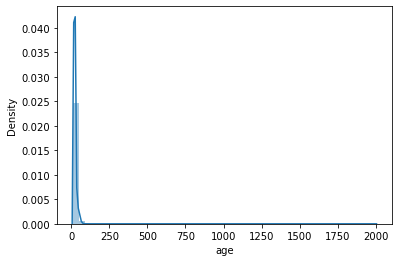

In [976]:
sns.distplot(dataframe['age'])

<AxesSubplot:xlabel='age'>

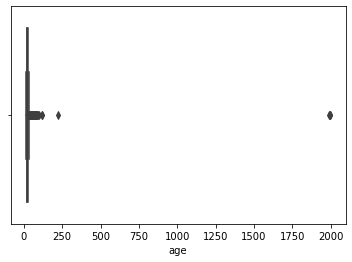

In [977]:
sns.boxplot(dataframe['age'])

In [978]:
print("Using IQR method")
print(computeIQR(dataframe['age']))
print("-----")
print("Using STD")
print(computeSTD(dataframe['age']))

Using IQR method
(7.5, 35.5)
-----
Using STD
(0, 88.35652144924609)


In [979]:
dataframe['age'].value_counts()

20      3789
21      3535
19      3510
18      3046
22      3009
23      2523
17      2309
16      2123
24      1918
25      1709
15      1415
26      1220
27      1026
14       933
28       852
29       641
30       623
13       489
31       443
32       424
33       396
34       311
35       293
36       238
38       231
37       200
40       197
39       178
42       170
45       146
47       139
41       124
55       120
44       118
50       118
46       118
43       116
48       107
49        88
52        85
53        83
54        72
51        69
57        68
56        59
58        56
60        42
61        40
59        35
62        29
63        26
65        23
64        23
66        16
67        14
68        12
72        10
70         9
71         8
69         8
75         8
73         6
77         4
79         4
80         4
76         3
74         2
1993       1
115        1
1991       1
1998       1
85         1
82         1
117        1
89         1
1996       1
223        1

In [980]:
lowerlimit, upperlimit = computeSTD(dataframe['age'])
print("Lower age = ", lowerlimit)
print("Upper age = ", upperlimit)

dataframe.loc[(dataframe['age'] < lowerlimit) | (dataframe['age'] > upperlimit),"age"] = dataframe['age'].median()

Lower age =  0
Upper age =  88.35652144924609


<AxesSubplot:xlabel='age', ylabel='Density'>

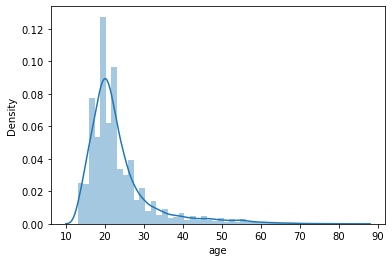

In [981]:
sns.distplot(dataframe['age'])

<AxesSubplot:xlabel='age'>

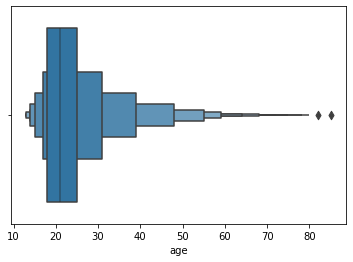

In [982]:
sns.boxenplot(x=dataframe['age']) 

In [983]:
def age_group(age):
    if age < 13:
        return 'Child'
    if  13 <= age < 18:
        return 'Adolescence'
    if 18 <= age < 60:
        return 'Adult'
    if age <= 60:
        return 'Senior Adult'
    
dataframe['age_group']= dataframe['age'].apply(age_group)
dataframe.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,country,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize,age_group
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,IN,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1,10,1,2,Adolescence
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,US,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,0,70,1,4,Adolescence
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,PL,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,3,60,1,3,Adolescence
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,US,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,5,70,1,5,Adolescence
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,MY,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1,10,1,4,Adult


<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Family Size</p>

<AxesSubplot:xlabel='familysize', ylabel='Density'>

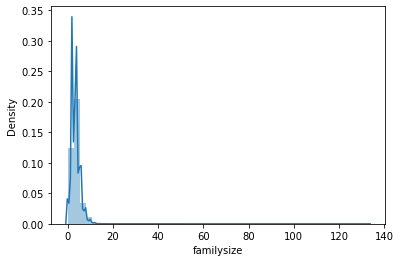

In [984]:
sns.distplot(dataframe['familysize'])

<AxesSubplot:xlabel='familysize'>

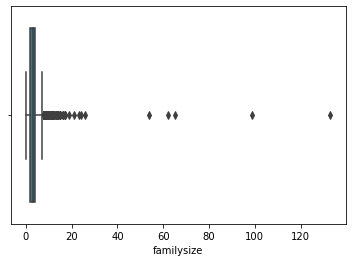

In [985]:
sns.boxplot(dataframe['familysize'])

In [986]:
dataframe['familysize'].value_counts()

3      9206
2      9018
4      7539
5      4830
1      2946
6      2450
7      1243
0      1125
8       676
9       331
10      195
11      109
12       56
13       19
14        8
15        6
16        5
17        3
24        1
23        1
21        1
19        1
62        1
26        1
65        1
54        1
99        1
133       1
Name: familysize, dtype: int64

In [987]:
print("Using IQR method")
print(computeIQR(dataframe['familysize']))
print("-----")
print("Using STD")
print(computeSTD(dataframe['familysize']))

Using IQR method
(0, 7.0)
-----
Using STD
(0, 9.934744200169776)


In [988]:
lowerlimit, upperlimit = computeSTD(dataframe['familysize'])
print("Lower familysize = ", lowerlimit)
print("Upper familysize = ", upperlimit)

dataframe.loc[(dataframe['familysize'] < lowerlimit) | (dataframe['familysize'] > upperlimit),"familysize"]= dataframe['familysize'].median()

Lower familysize =  0
Upper familysize =  9.934744200169776


<AxesSubplot:xlabel='familysize', ylabel='Density'>

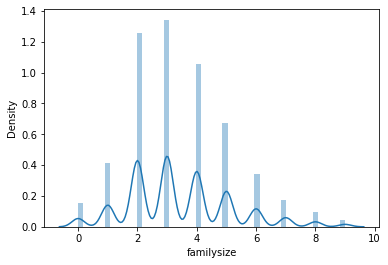

In [989]:
sns.distplot(dataframe['familysize'])

<AxesSubplot:xlabel='familysize'>

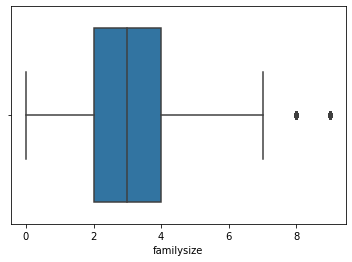

In [990]:
sns.boxplot(dataframe['familysize'])

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Country</p>


In [991]:
dataframe['country'].value_counts()


MY      21607
US       8207
GB       1180
CA        978
ID        884
PH        749
AU        608
NONE      539
IN        446
DE        314
SG        292
NZ        216
FR        187
BR        180
PL        172
BN        171
MX        154
RO        143
IT        138
NL        114
ES         90
JP         85
FI         81
TR         80
ZA         79
PK         79
SE         76
EG         75
GR         74
IE         74
RS         67
PT         61
RU         61
CZ         58
HK         57
SA         56
AR         55
HR         54
DK         52
AE         52
JM         50
NO         49
HU         47
CH         46
AT         45
VN         39
BG         38
BE         35
KR         31
CL         30
TH         29
CO         27
IL         25
SK         24
LT         24
UA         24
MA         23
BA         22
NG         21
EE         20
BD         19
VE         18
PE         18
JO         18
SI         17
TW         16
AL         16
LK         15
MK         15
IS         14
KW         14
LB    

In [992]:
dataframe.loc[dataframe['country'] == 'NONE',"country"]= dataframe['country'].mode()

In [993]:
dataframe['country'].value_counts()


MY    21607
US     8207
GB     1180
CA      978
ID      884
PH      749
AU      608
IN      446
DE      314
SG      292
NZ      216
FR      187
BR      180
PL      172
BN      171
MX      154
RO      143
IT      138
NL      114
ES       90
JP       85
FI       81
TR       80
ZA       79
PK       79
SE       76
EG       75
GR       74
IE       74
RS       67
RU       61
PT       61
CZ       58
HK       57
SA       56
AR       55
HR       54
AE       52
DK       52
JM       50
NO       49
HU       47
CH       46
AT       45
VN       39
BG       38
BE       35
KR       31
CL       30
TH       29
CO       27
IL       25
LT       24
SK       24
UA       24
MA       23
BA       22
NG       21
EE       20
BD       19
JO       18
VE       18
PE       18
SI       17
AL       16
TW       16
MK       15
LK       15
IS       14
KW       14
LB       13
QA       12
CR       12
CN       12
GE       11
TT       10
SV        9
IR        9
EC        8
LV        8
PR        8
PA        7
DO        7
GT  

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Married</p>

In [994]:
dataframe['married'].value_counts()

1    34131
2     4357
3     1092
0      195
Name: married, dtype: int64

In [995]:
dataframe.loc[dataframe['married'] == 0,"married"]= dataframe['married'].median()

In [996]:
dataframe['married'].value_counts()

1    34326
2     4357
3     1092
Name: married, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Urban</p>

In [997]:
dataframe['urban'].value_counts()

3    17843
2    13232
1     8318
0      382
Name: urban, dtype: int64

In [998]:
dataframe.loc[dataframe['urban'] == 0,"urban"]= dataframe['urban'].median()

In [999]:
dataframe['urban'].value_counts()

3    17843
2    13614
1     8318
Name: urban, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Gender</p>

In [1000]:
dataframe['gender'].value_counts()

2    30367
1     8789
3      552
0       67
Name: gender, dtype: int64

In [1001]:
dataframe.loc[dataframe['gender'] == 0,"gender"] = dataframe['gender'].median()

In [1002]:
dataframe['gender'].value_counts()

2    30434
1     8789
3      552
Name: gender, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Orientation</p>

In [1003]:
dataframe['orientation'].value_counts()

1    24269
2     5006
5     3460
0     3109
4     1976
3     1955
Name: orientation, dtype: int64

In [1004]:
dataframe.loc[dataframe['orientation'] == 0,"orientation"] = dataframe['orientation'].median()

In [1005]:
dataframe['orientation'].value_counts()

1    27378
2     5006
5     3460
4     1976
3     1955
Name: orientation, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Religion</p>

In [1006]:
dataframe['religion'].value_counts()

10    22073
2      3845
1      3245
4      3097
7      2254
12     1804
6      1544
8       700
3       527
0       356
9       144
5       122
11       64
Name: religion, dtype: int64

In [1007]:
dataframe.loc[dataframe['religion'] == 0,"religion"] = dataframe['religion'].median()

In [1008]:
dataframe['religion'].value_counts()

10    22429
2      3845
1      3245
4      3097
7      2254
12     1804
6      1544
8       700
3       527
9       144
5       122
11       64
Name: religion, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Education</p>

In [1009]:
dataframe['education'].value_counts()

3    15120
2    15066
4     5008
1     4066
0      515
Name: education, dtype: int64

In [1010]:
dataframe.loc[dataframe['education'] == 0,"education"] = dataframe['education'].median()

In [1011]:
dataframe['education'].value_counts()

3    15635
2    15066
4     5008
1     4066
Name: education, dtype: int64

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Depression scale</p>

In [1012]:
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
temp = 0;
for i in DASS_keys["Depression"]:
    temp += dataframe['Q'+str(i)+'A']
    
dataframe['total_score'] = temp

In [1013]:
def condition(score):
    if score <= 9:
        return 'Normal'
    if  10 <= score <= 13:
        return 'Mild'
    if 14 <= score <= 20:
        return 'Moderate'
    if 21 <= score <= 27:
        return 'Severe'
    if score > 28:
        return 'Extremely Severe'

dataframe['depression_scale'] = dataframe['total_score'].apply(condition)

In [1014]:
dataframe.drop(['age', 'total_score'], axis=1, inplace=True)
dataframe.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,country,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,religion,orientation,race,married,familysize,age_group,depression_scale
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,IN,1,5,7,7,7,7,7,5,1,1,2,3,2,12,1,10,1,2,Adolescence,Extremely Severe
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,US,6,5,4,7,5,4,7,7,1,5,2,3,2,7,1,70,1,4,Adolescence,Extremely Severe
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,PL,2,5,2,2,5,6,5,5,3,2,2,3,2,4,3,60,1,3,Adolescence,Extremely Severe
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,US,1,1,7,4,6,4,6,1,6,1,1,3,2,4,5,70,1,5,Adolescence,Extremely Severe
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,MY,2,5,3,6,5,5,5,6,3,3,3,2,2,10,1,10,1,4,Adult,Extremely Severe


<hr>

<p style="border:1px solid black; text-align:center; padding: 10px 0; background-color: black; color: white; text-transform: uppercase; letter-spacing: 2px;"><b>Extracting Insights</b></p>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>education</b> feature</p>

<AxesSubplot:xlabel='education', ylabel='count'>

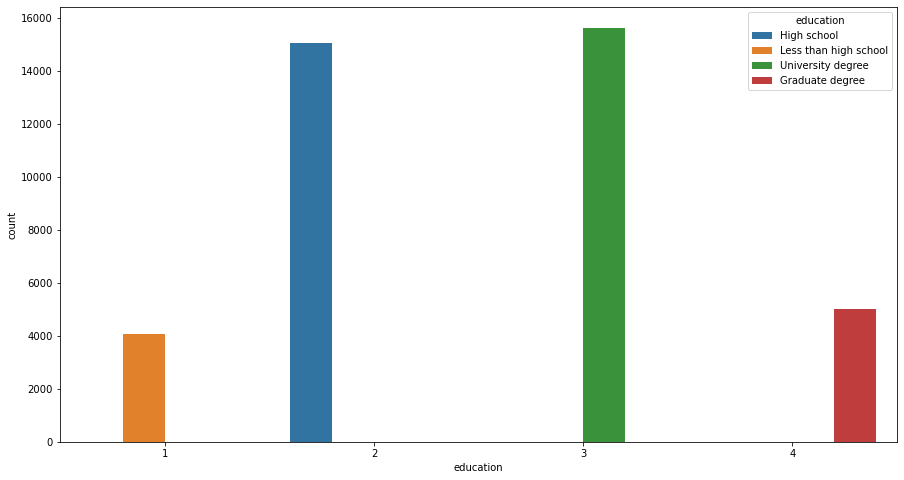

In [1015]:
# mapping
dataframe['education'] = dataframe['education'].map({1: 1, 2: 2, 3: 3, 4: 4 })

# information
def changeEducationTitle(title) -> str:
    if title == 0 or title == 1:
        return 'Less than high school'
    if title == 2:
        return 'High school'
    if title == 3: 
        return 'University degree'
    if title == 4: 
        return 'Graduate degree'
    return title

# applying corresponding information to its initial numeric data
education_string = dataframe['education'].apply(changeEducationTitle)

# plotting
plt.figure(figsize=(15, 8))
sns.countplot(x=dataframe['education'], hue=education_string)

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most people who participated in the survey are high school and university students.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>country</b> feature</p>

Text(0.5, 1.0, 'Top 20 Countries from where people participated in the Survey')

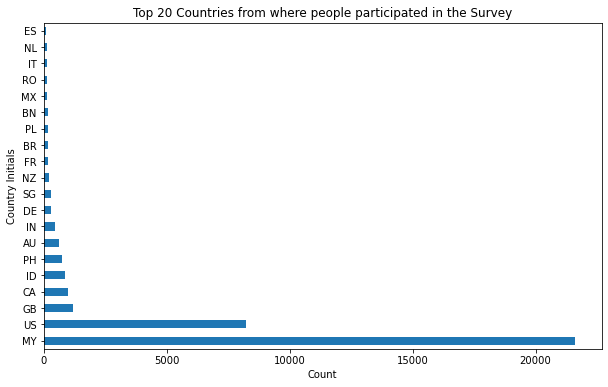

In [1016]:
# plotting
plt.figure(figsize=(10,6))
dataframe['country'].value_counts()[:20].plot(kind='barh')
plt.ylabel('Country Initials')
plt.xlabel('Count')
plt.title('Top 20 Countries from where people participated in the Survey')

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most race who participated in the survey are Asians.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>urban</b> feature</p>

<AxesSubplot:xlabel='urban', ylabel='count'>

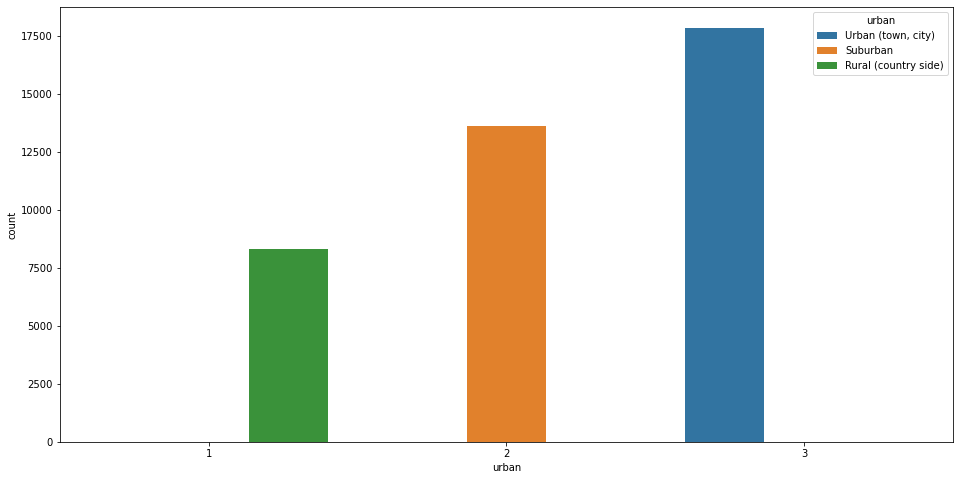

In [1017]:
# mapping
dataframe['urban'] = dataframe['urban'].map({1: 1, 2: 2, 3: 3})

# information
def changeUrbanValues(value):
    if value == 1:
        return 'Rural (country side)'
    if value == 2:
        return 'Suburban'
    if value == 3:
        return 'Urban (town, city)'
    return value 

# applying corresponding information to its initial numeric data
urban = dataframe['urban'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['urban'], hue= urban)

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most people who participated in the survey are living in an urban area.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>age</b> feature</p>

<AxesSubplot:xlabel='age_group', ylabel='count'>

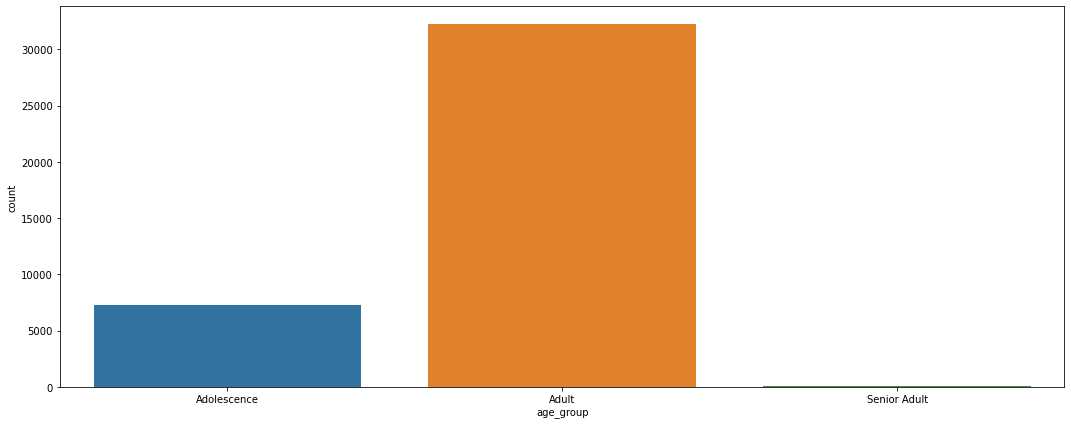

In [1018]:
# plotting
plt.figure(figsize=(18, 7))
sns.countplot(x=dataframe['age_group'])

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most people who participated in the survey are living in an urban area.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>age</b> feature</p>

<AxesSubplot:xlabel='religion', ylabel='count'>

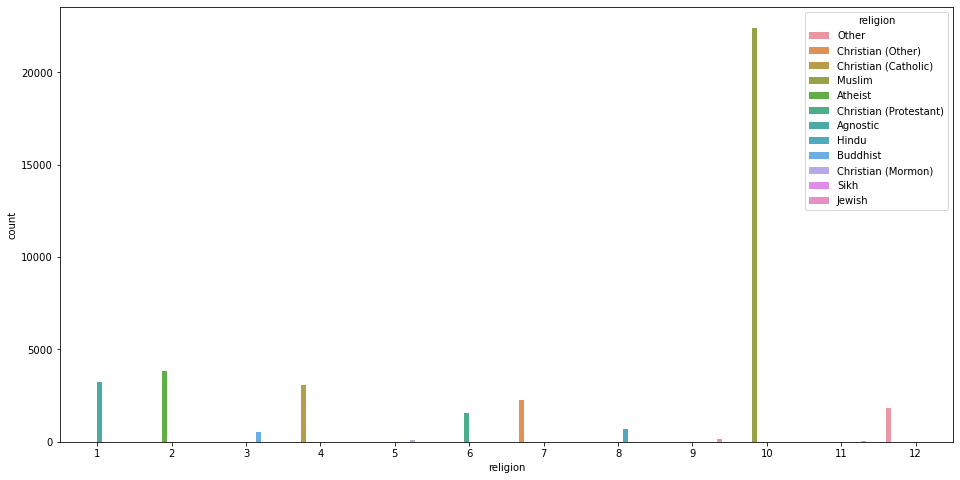

In [1019]:
# mapping
dataframe['religion'] = dataframe['religion'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12})

# information
def changeUrbanValues(value):
    if value == 1:
        return 'Agnostic'
    if value == 2:
        return 'Atheist'
    if value == 3:
        return 'Buddhist'
    if value == 4:
        return 'Christian (Catholic)'
    if value == 5:
        return 'Christian (Mormon)'
    if value == 6:
        return 'Christian (Protestant)'
    if value == 7:
        return 'Christian (Other)'
    if value == 8:
        return 'Hindu'
    if value == 9:
        return 'Jewish'
    if value == 10:
        return 'Muslim'
    if value == 11:
        return 'Sikh'
    if value == 12:
        return 'Other'
    return value 

# applying corresponding information to its initial numeric data
religion = dataframe['religion'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['religion'], hue = religion)

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most religion who participated in the survey are muslims.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>age</b> feature</p>

<AxesSubplot:xlabel='race', ylabel='count'>

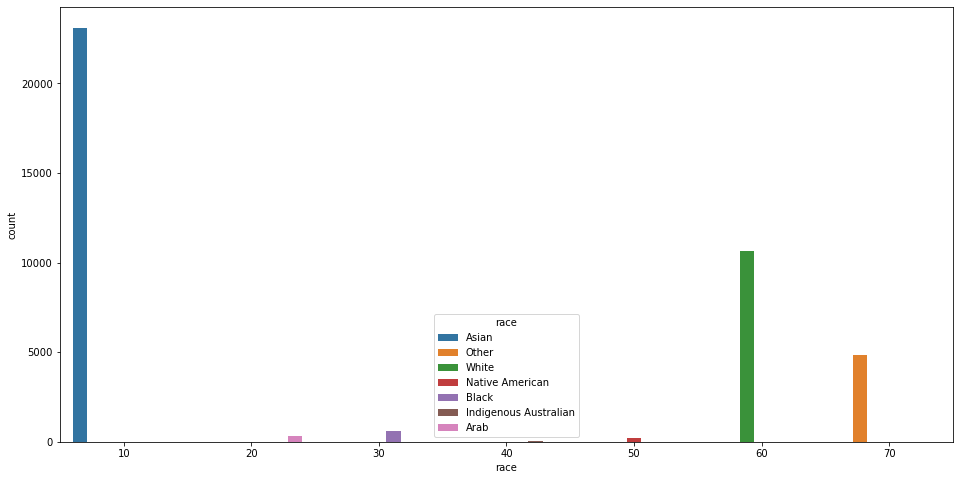

In [1020]:
# mapping
dataframe['race'] = dataframe['race'].map({10: 10, 20: 20, 30: 30, 40: 40, 50: 50, 60: 60, 70: 70})

# information
def changeUrbanValues(value):
    if value == 10:
        return 'Asian'
    if value == 20:
        return 'Arab'
    if value == 30:
        return 'Black'
    if value == 40:
        return 'Indigenous Australian'
    if value == 50:  
        return 'Native American'
    if value == 60:  
        return 'White'
    if value == 70:  
        return 'Other'
    return value 

# applying corresponding information to its initial numeric data
race = dataframe['race'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['race'], hue= race)

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most religion who participated in the survey are muslims.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>age</b> feature</p>

<AxesSubplot:xlabel='married', ylabel='count'>

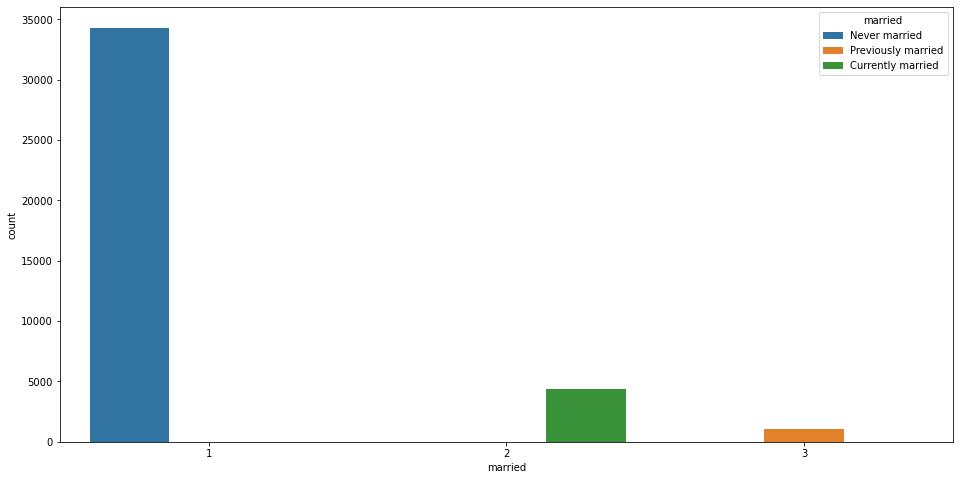

In [1021]:
# mapping
dataframe['married'] = dataframe['married'].map({1: 1, 2: 2, 3: 3})

# information
def changeUrbanValues(value):
    if value == 1:
        return 'Never married'
    if value == 2:
        return 'Currently married'
    if value == 3:
        return 'Previously married'
    return value 

# applying corresponding information to its initial numeric data
married = dataframe['married'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['married'], hue= married)

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most people who participated in the survey are never married.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>familysize</b> feature</p>

<AxesSubplot:xlabel='familysize', ylabel='count'>

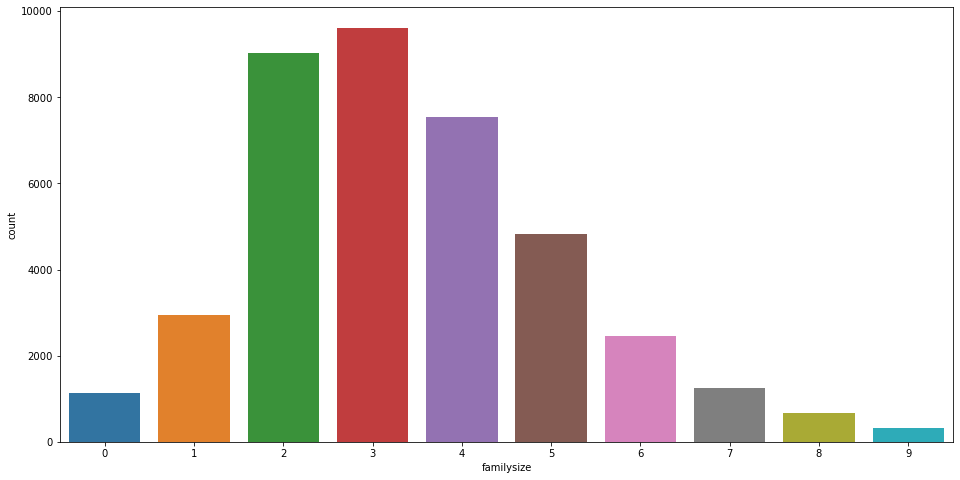

In [1022]:
# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x=dataframe['familysize'])

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most people who participated in the survey are never married.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>familysize</b> feature</p>

<AxesSubplot:xlabel='orientation', ylabel='count'>

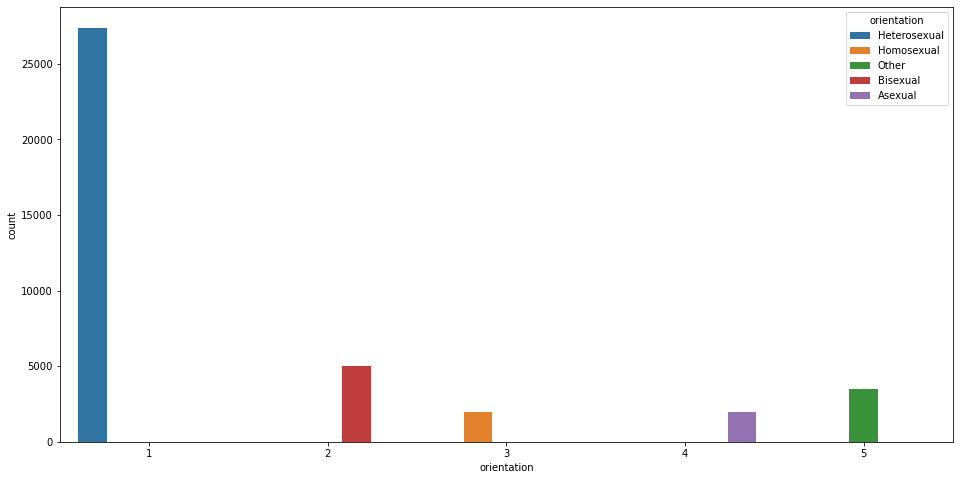

In [1023]:
# mapping
dataframe['orientation'] = dataframe['orientation'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 5})

# information
def changeUrbanValues(value):
    if value == 1:
        return 'Heterosexual'
    if value == 2:
        return 'Bisexual'
    if value == 3:
        return 'Homosexual'
    if value == 4:
        return 'Asexual'
    if value == 5:
        return 'Other'
    return value 

# applying corresponding information to its initial numeric data
orientation = dataframe['orientation'].apply(changeUrbanValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['orientation'], hue = orientation)

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most people who participated in the survey are heterosexual.</p>

<hr>

<p style="border-left: 3px solid black; padding: 5px 5px 5px 10px;">Extracting insights for <b>gender</b> feature</p>

<AxesSubplot:xlabel='gender', ylabel='count'>

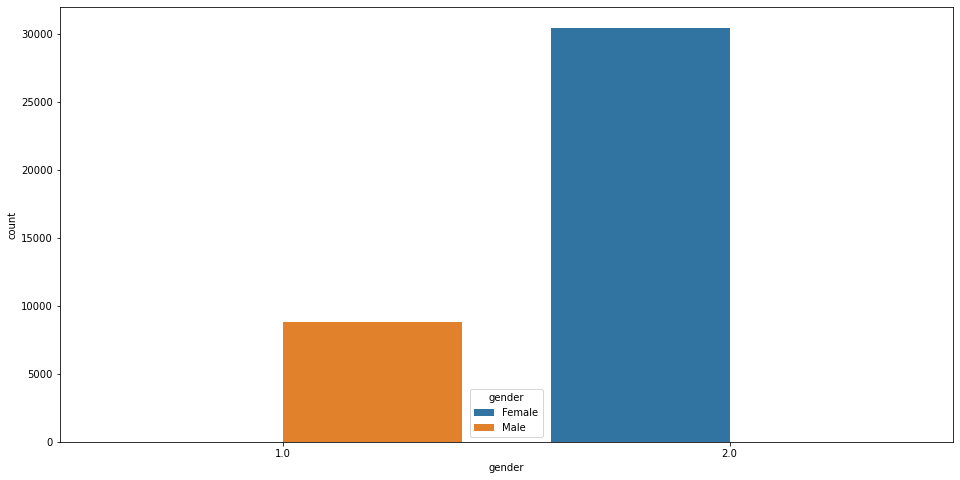

In [1024]:
# mapping
dataframe['gender'] = dataframe['gender'].map({1: 1, 2: 2})

# information
def changeGenderValues(value):
    if value == 1:
        return 'Male'
    if value == 2:
        return 'Female'

# applying corresponding information to its initial numeric data
gender = dataframe['gender'].apply(changeGenderValues)

# plotting
plt.figure(figsize=(16, 8))
sns.countplot(x = dataframe['gender'], hue = gender)

<p style="text-align:center; background-color: yellow;padding: 10px; border: 1px solid black">The most people who participated in the survey are heterosexual.</p>

Text(0.5, 1.0, 'Depression Condition of Different Gender')

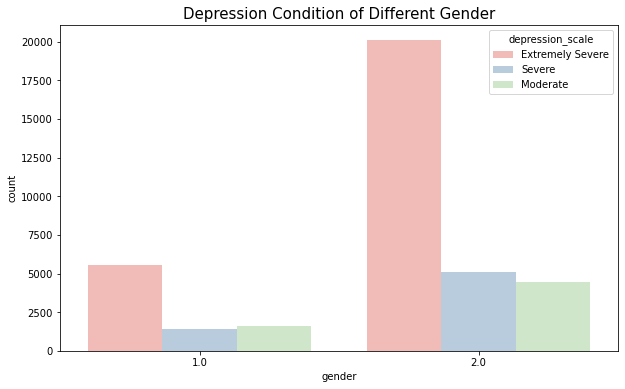

In [1025]:
plt.figure(figsize=(10,6))
sns.countplot(dataframe.sort_values('gender').gender,hue=dataframe['depression_scale'],palette='Pastel1')
plt.title('Depression Condition of Different Gender',fontsize=15)

Text(0.5, 1.0, 'Depression State of People as of Married or Not')

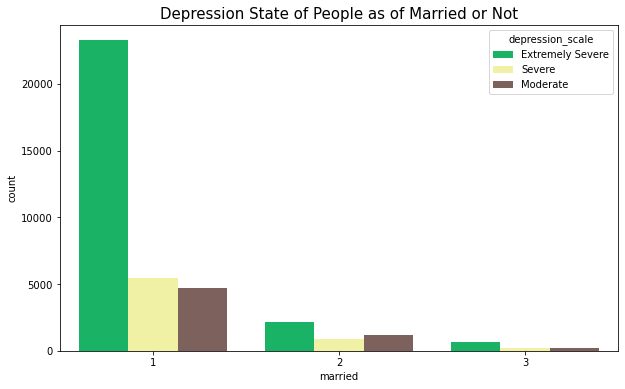

In [1026]:
plt.figure(figsize=(10,6))
sns.countplot(dataframe.sort_values('married').married,hue=dataframe['depression_scale'],palette='terrain')
plt.title('Depression State of People as of Married or Not',fontsize=15)

Text(0.5, 1.0, 'Depression Condition as per Religion')

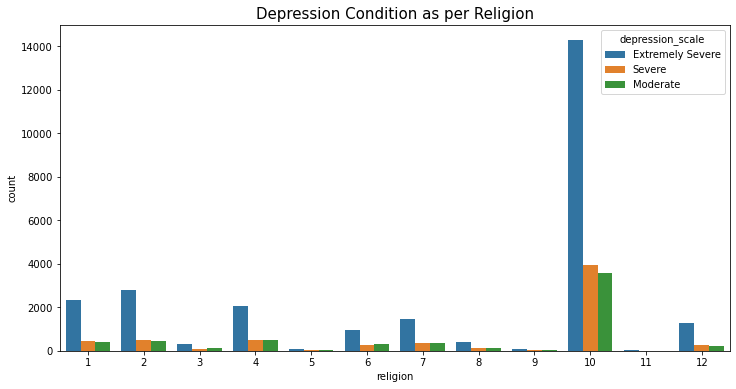

In [1027]:
plt.figure(figsize=(12,6))
a=sns.countplot(dataframe.sort_values('religion').religion,hue=dataframe['depression_scale'])
plt.title('Depression Condition as per Religion',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per different sexual Orientations')

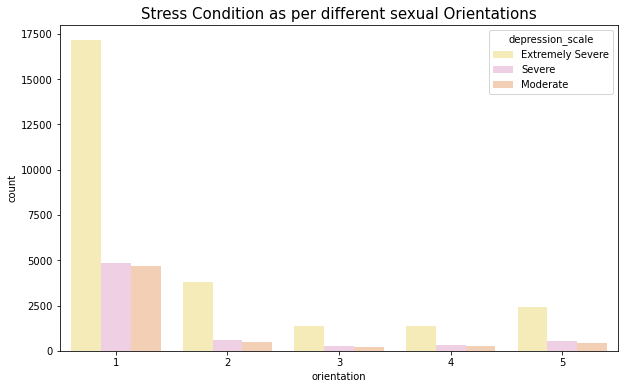

In [1028]:
plt.figure(figsize=(10,6))
sns.countplot(dataframe.sort_values('orientation').orientation,hue=dataframe['depression_scale'],palette='Pastel2_r')
plt.title('Stress Condition as per different sexual Orientations',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per different Age Groups')

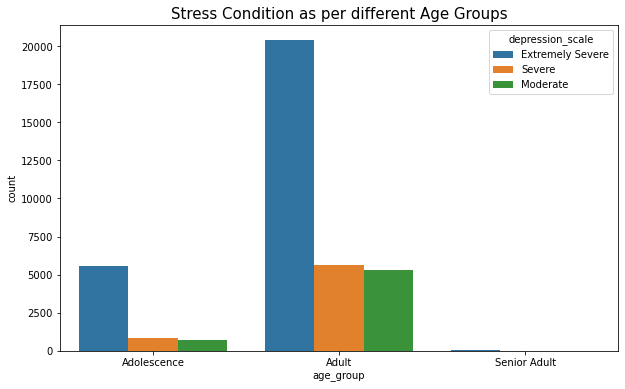

In [1029]:
plt.figure(figsize=(10,6))
sns.countplot(dataframe.sort_values('age_group').age_group,hue=dataframe['depression_scale'])
plt.title('Stress Condition as per different Age Groups',fontsize=15)

# MODEL

In [1030]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

In [1031]:
dataframe.dtypes

Q3A                   int64
Q5A                   int64
Q10A                  int64
Q13A                  int64
Q16A                  int64
Q17A                  int64
Q21A                  int64
Q24A                  int64
Q26A                  int64
Q31A                  int64
Q34A                  int64
Q37A                  int64
Q38A                  int64
Q42A                  int64
country              object
TIPI1                 int64
TIPI2                 int64
TIPI3                 int64
TIPI4                 int64
TIPI5                 int64
TIPI6                 int64
TIPI7                 int64
TIPI8                 int64
TIPI9                 int64
TIPI10                int64
education             int64
urban                 int64
gender              float64
religion              int64
orientation           int64
race                  int64
married               int64
familysize            int64
age_group            object
depression_scale     object
dtype: object

In [1032]:
#split 
target = dataframe['depression_scale']
# dataframe.drop(['country'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

dataframe['country']=lbl.fit_transform(dataframe['country'])
dataframe['depression_scale']=lbl.fit_transform(dataframe['depression_scale'])
dataframe['age_group']=lbl.fit_transform(dataframe['age_group'])
dataframe['gender']=lbl.fit_transform(dataframe['gender'])


In [1033]:
dataframe.dtypes

Q3A                 int64
Q5A                 int64
Q10A                int64
Q13A                int64
Q16A                int64
Q17A                int64
Q21A                int64
Q24A                int64
Q26A                int64
Q31A                int64
Q34A                int64
Q37A                int64
Q38A                int64
Q42A                int64
country             int32
TIPI1               int64
TIPI2               int64
TIPI3               int64
TIPI4               int64
TIPI5               int64
TIPI6               int64
TIPI7               int64
TIPI8               int64
TIPI9               int64
TIPI10              int64
education           int64
urban               int64
gender              int64
religion            int64
orientation         int64
race                int64
married             int64
familysize          int64
age_group           int32
depression_scale    int32
dtype: object

In [1034]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataframe, target, test_size=.2, random_state = 42)
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (31820, 35), y_train: (31820,)
x_test: (7955, 35), y_test: (7955,)


In [1035]:
#scale

In [1036]:
scaler=MinMaxScaler()


X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

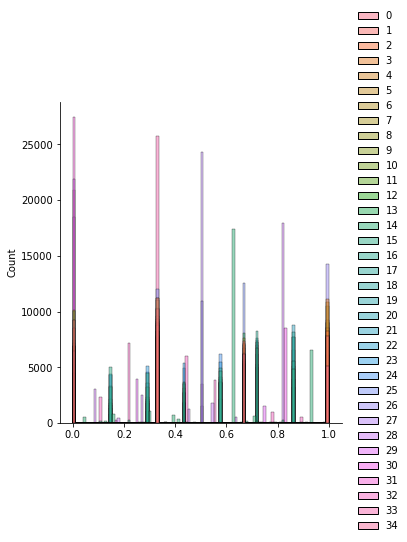

In [1037]:
sns.displot(X_train_scaled)


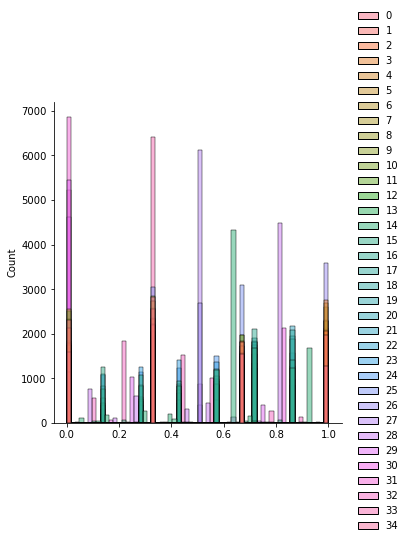

In [1038]:
sns.displot(X_test_scaled)


In [1039]:
dataframe['country'] = dataframe['country'].astype('int64')
dataframe['age_group'] = dataframe['age_group'].astype('int64')
dataframe['depression_scale'] = dataframe['depression_scale'].astype('int64')

dataframe.dtypes

Q3A                 int64
Q5A                 int64
Q10A                int64
Q13A                int64
Q16A                int64
Q17A                int64
Q21A                int64
Q24A                int64
Q26A                int64
Q31A                int64
Q34A                int64
Q37A                int64
Q38A                int64
Q42A                int64
country             int64
TIPI1               int64
TIPI2               int64
TIPI3               int64
TIPI4               int64
TIPI5               int64
TIPI6               int64
TIPI7               int64
TIPI8               int64
TIPI9               int64
TIPI10              int64
education           int64
urban               int64
gender              int64
religion            int64
orientation         int64
race                int64
married             int64
familysize          int64
age_group           int64
depression_scale    int64
dtype: object

In [1053]:

import fiftyone.core.odm as foo
foo.delete_dataset(None)

from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(X_train_scaled, y_train)

ModuleNotFoundError: No module named 'fiftyone'

ValueError: Boolean array expected for the condition, not int64